<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/4.2%20Spectral%20Graph%20Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 Spectral Graph Bipartitioning

Key Concepts:

- Graph Partitioning
- Raleigh Quotient
- Balancing the Cut


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Graph Partitioning

A **Graph Partitioning** is a way to divide a graph into two disjoint sets of nodes such that the number of edges between the two sets is minimized.

$ \text{cut}(V_1, V_2) = \sum_{i \in V_1, j \in V_2} M_{ij} $

### Raleigh Quotient

The **Raleigh Quotient** is a measure of how well a graph can be bipartitioned.

Given a graph $G = (V, E)$ with Laplacian matrix $L$ and partition vector $p$, the Raleigh Quotient is defined as:

$R(p) = \frac{p^TLp}{p^Tp} = \frac{1}{n} \cdot 4 \text{cut}(V_1, V_2)$


## Balancing the Cut

The **Balanced Cut** is a special case of graph partitioning where the two sets are of equal size and the number of edges between the two sets is minimized.

In order to find the balanced cut, we can minimize the Raleigh Quotient $R(p)$.
First, we need to define a diagonal matrix $W$. For a matrix, $w_{ii}$ is the weight for vertex $v_i$. For a subset of vertices, $w_{ii}$ is the sum of the weights of the vertices in the subset $\sum_{i \in V_i} w_{ii}$.

Now, we can minimize the function as follows:

$Q(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{W_{V_1}} + \frac{\text{cut}(V_1, V_2)}{W_{V_2}}$

Favor partitions that have small cut values but are balanced.

### Serialized Partition Vector

$ q_i = \begin{cases} {+ \sqrt{\frac{v_2}{v_1}}} & \text{if } i \in V_1, \\ {- \sqrt{\frac{v_1}{v_2}}} & \text{if } i \in V_2, \end{cases} $


### Ratio and Normalized Cut

One commonly used $W = diag(w_{ii})$ is to choose $w_{ii} = \sum_k E_{ik}$, which is the sum of the weights of the edges incident to node $v_i$.
This is called the **Degree Matrix**.

#### Ratio Cut

The ratio-cut objective function in defined as:

$\text{Ratio-cut}(V_1, V_2) = \rho(S) = \frac{\text{cut}(V_1, V_2)}{|V_1|} + \frac{\text{cut}(V_1, V_2)}{|V_2|}$

#### Normalized Cut

The normalized-cut objective function is defined as:

$\text{Normalized-cut}(V_1, V_2) = \eta(S) = \frac{\text{cut}(V_1, V_2)}{\sum_{i \in V_1} w_{ii}} + \frac{\text{cut}(V_1, V_2)}{\sum_{i \in V_2} w_{ii}} = 2 - S(V_1, V_2)$

where $S(V_1, V_2) = \frac{\text{within}(V_1)}{\sum_{i \in V_1} w_{ii}} + \frac{\text{within}(V_2)}{\sum_{i \in V_2} w_{ii}}$

where $\text{within} (V_i) = \sum_{j \in V_i} w_{ij}$

$S$ describes the strengths of associations within each partition.


## Demo

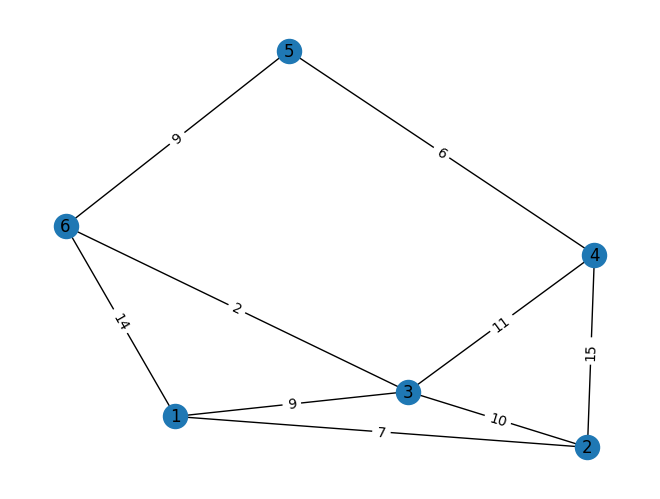

In [3]:
# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([
  (1, 2, 7),
  (1, 3, 9),
  (1, 6, 14),
  (2, 3, 10),
  (2, 4, 15),
  (3, 4, 11),
  (3, 6, 2),
  (4, 5, 6),
  (5, 6, 9),
])
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [4]:
# Create the Laplacian matrix
L = nx.laplacian_matrix(G)
L = L.todense()
print("Laplacian Matrix:\n", L)

Laplacian Matrix:
 [[ 30  -7  -9 -14   0   0]
 [ -7  32 -10   0 -15   0]
 [ -9 -10  32  -2 -11   0]
 [-14   0  -2  25   0  -9]
 [  0 -15 -11   0  32  -6]
 [  0   0   0  -9  -6  15]]


In [5]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# Sort the eigenvalues and eigenvectors
idx = eigenvalues.argsort()

# Get the first eigenvector
eigenvector = eigenvectors[:, idx[1]]

print("Eigenvector:\n", eigenvector)
print("Eigenvalues:\n", eigenvalues)

Eigenvector:
 [[-0.02017232]
 [-0.41210333]
 [-0.34576895]
 [ 0.40284199]
 [-0.30103844]
 [ 0.67624104]]
Eigenvalues:
 [-1.42108547e-14  5.02860353e+01  4.34248026e+01  4.10193145e+01
  1.89602304e+01  1.23096172e+01]


In [6]:
# Get the partition vector
partition_vector = np.sign(eigenvector)
print(partition_vector)

[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
